## 반도체 웨이퍼 불량 검출 솔류션 실습 w/ YoloV8 w/ RoboFlow
- https://app.roboflow.com/hwooks

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%pip install ultralytics -q

In [13]:
!pip install roboflow -q

In [14]:
################### download 코드로 받아서..여기에 붙여넣기
## !pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="nSpvoDIk04DXxr9J5aRN")
project = rf.workspace("hwooks").project("defect_detection_v2")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.9, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Defect_Detection_V2-3 in yolov8:: 100%|██████████| 1362/1362 [00:00<00:00, 4294.13it/s]


In [6]:
!pip install PyYAML -q

In [17]:
# yaml 파일을 학습이 가능하도록 경로 설정.
# key-value 데이터인 dict 데이터타입으로 data['train'], data['val'], data['nc'], data['names'] 에 넣어주는데,
# 가장 중요한 부분은 데이터 경로 설정임.

import yaml

data = { 'train' : '/content/Defect_Detection_V2-3/train/images',
         'val' : '/content/Defect_Detection_V2-3/valid/images',
         'test' : '/content/Defect_Detection_V2-3/test/images',
         'names' : ['bulge', 'circle', 'curve', 'cut', 'dot', 'edge', 'fat', 'line', 'lineRoughness', 'scratch', 'short', 'spot', 'stain','thin'],
         'nc' : 14 }

with open('/content/Defect_Detection_V2-3/data.yaml', 'w') as f:
  yaml.dump(data, f)


with open('/content/Defect_Detection_V2-3/data.yaml', 'r') as f:
  data_yaml = yaml.safe_load(f)
  display(data_yaml)

{'names': ['bulge',
  'circle',
  'curve',
  'cut',
  'dot',
  'edge',
  'fat',
  'line',
  'lineRoughness',
  'scratch',
  'short',
  'spot',
  'stain',
  'thin'],
 'nc': 14,
 'test': '/content/Defect_Detection_V2-3/test/images',
 'train': '/content/Defect_Detection_V2-3/train/images',
 'val': '/content/Defect_Detection_V2-3/valid/images'}

In [19]:
!cat /content/Defect_Detection_V2-3/data.yaml

names:
- bulge
- circle
- curve
- cut
- dot
- edge
- fat
- line
- lineRoughness
- scratch
- short
- spot
- stain
- thin
nc: 14
test: /content/Defect_Detection_V2-3/test/images
train: /content/Defect_Detection_V2-3/train/images
val: /content/Defect_Detection_V2-3/valid/images


## 데이터 세트
- 데이터 형식: JPG 이미지(1000*1000 px)
- 데이터 개수: 280장
- 동일한 환경에서 촬영된 반도체 웨이퍼 사진

In [18]:
# Load YOLOv8n

from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model

In [7]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [21]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='/content/Defect_Detection_V2-3/data.yaml',batch=32,patience=20, epochs=100, imgsz=640)
#model.train(data='/content/drive/MyDrive/KITA_2024/M8_Vision응용/Semiconductor/data/data.yaml',batch=32,patience=20, epochs=100, imgsz=1024, save=True, save_preriod=10, name=~~/best_weight/)

Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


- Fitness는 모델의 전체적인 성능을 나타내는 종합 지표입니다. YOLOv8에서 다양한 평가 지표(precision, recall, mAP 등)를 기반으로 모델의 적합성을 계산한 값입니다. 이 값은 0에서 1 사이의 값이며, 값이 클수록 모델의 성능이 좋다고 볼 수 있습니다.
- keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
이 항목은 YOLOv8에서 학습 후 평가에 사용된 주요 지표들의 목록을 보여줍니다.
  - Precision (정밀도): 모델이 탐지한 객체 중에서 올바르게 탐지된 객체의 비율입니다.
  - Recall (재현율): 실제로 존재하는 객체 중에서 모델이 올바르게 탐지한 비율입니다.
  - mAP50 (Mean Average Precision at IoU=0.50): Intersection over Union (IoU) 값이 0.5일 때의 평균 정밀도입니다.
  - mAP50-95 (Mean Average Precision at IoU=0.50 to 0.95): IoU 값이 0.5부터 0.95까지의 평균 정밀도입니다. 더 세밀한 평가를 반영하는 지표입니다.
- maps: array([...])
  - Mean Average Precision (mAP) 값들의 배열을 나타냅니다. 각 클래스에 대해 mAP50-95 점수를 보여줍니다.
- names: 이 항목은 클래스 ID와 클래스 이름을 매핑한 딕셔너리입니다.
- results_dict: {...}
  - Precision, Recall, mAP50, mAP50-95, fitness 등의 평가 지표를 다시 한 번 딕셔너리 형태로 요약해서 보여줍니다

In [13]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 14
{0: 'bulge', 1: 'circle', 2: 'curve', 3: 'cut', 4: 'dot', 5: 'edge', 6: 'fat', 7: 'line', 8: 'lineRoughness', 9: 'scratch', 10: 'short', 11: 'spot', 12: 'stain', 13: 'thin'}


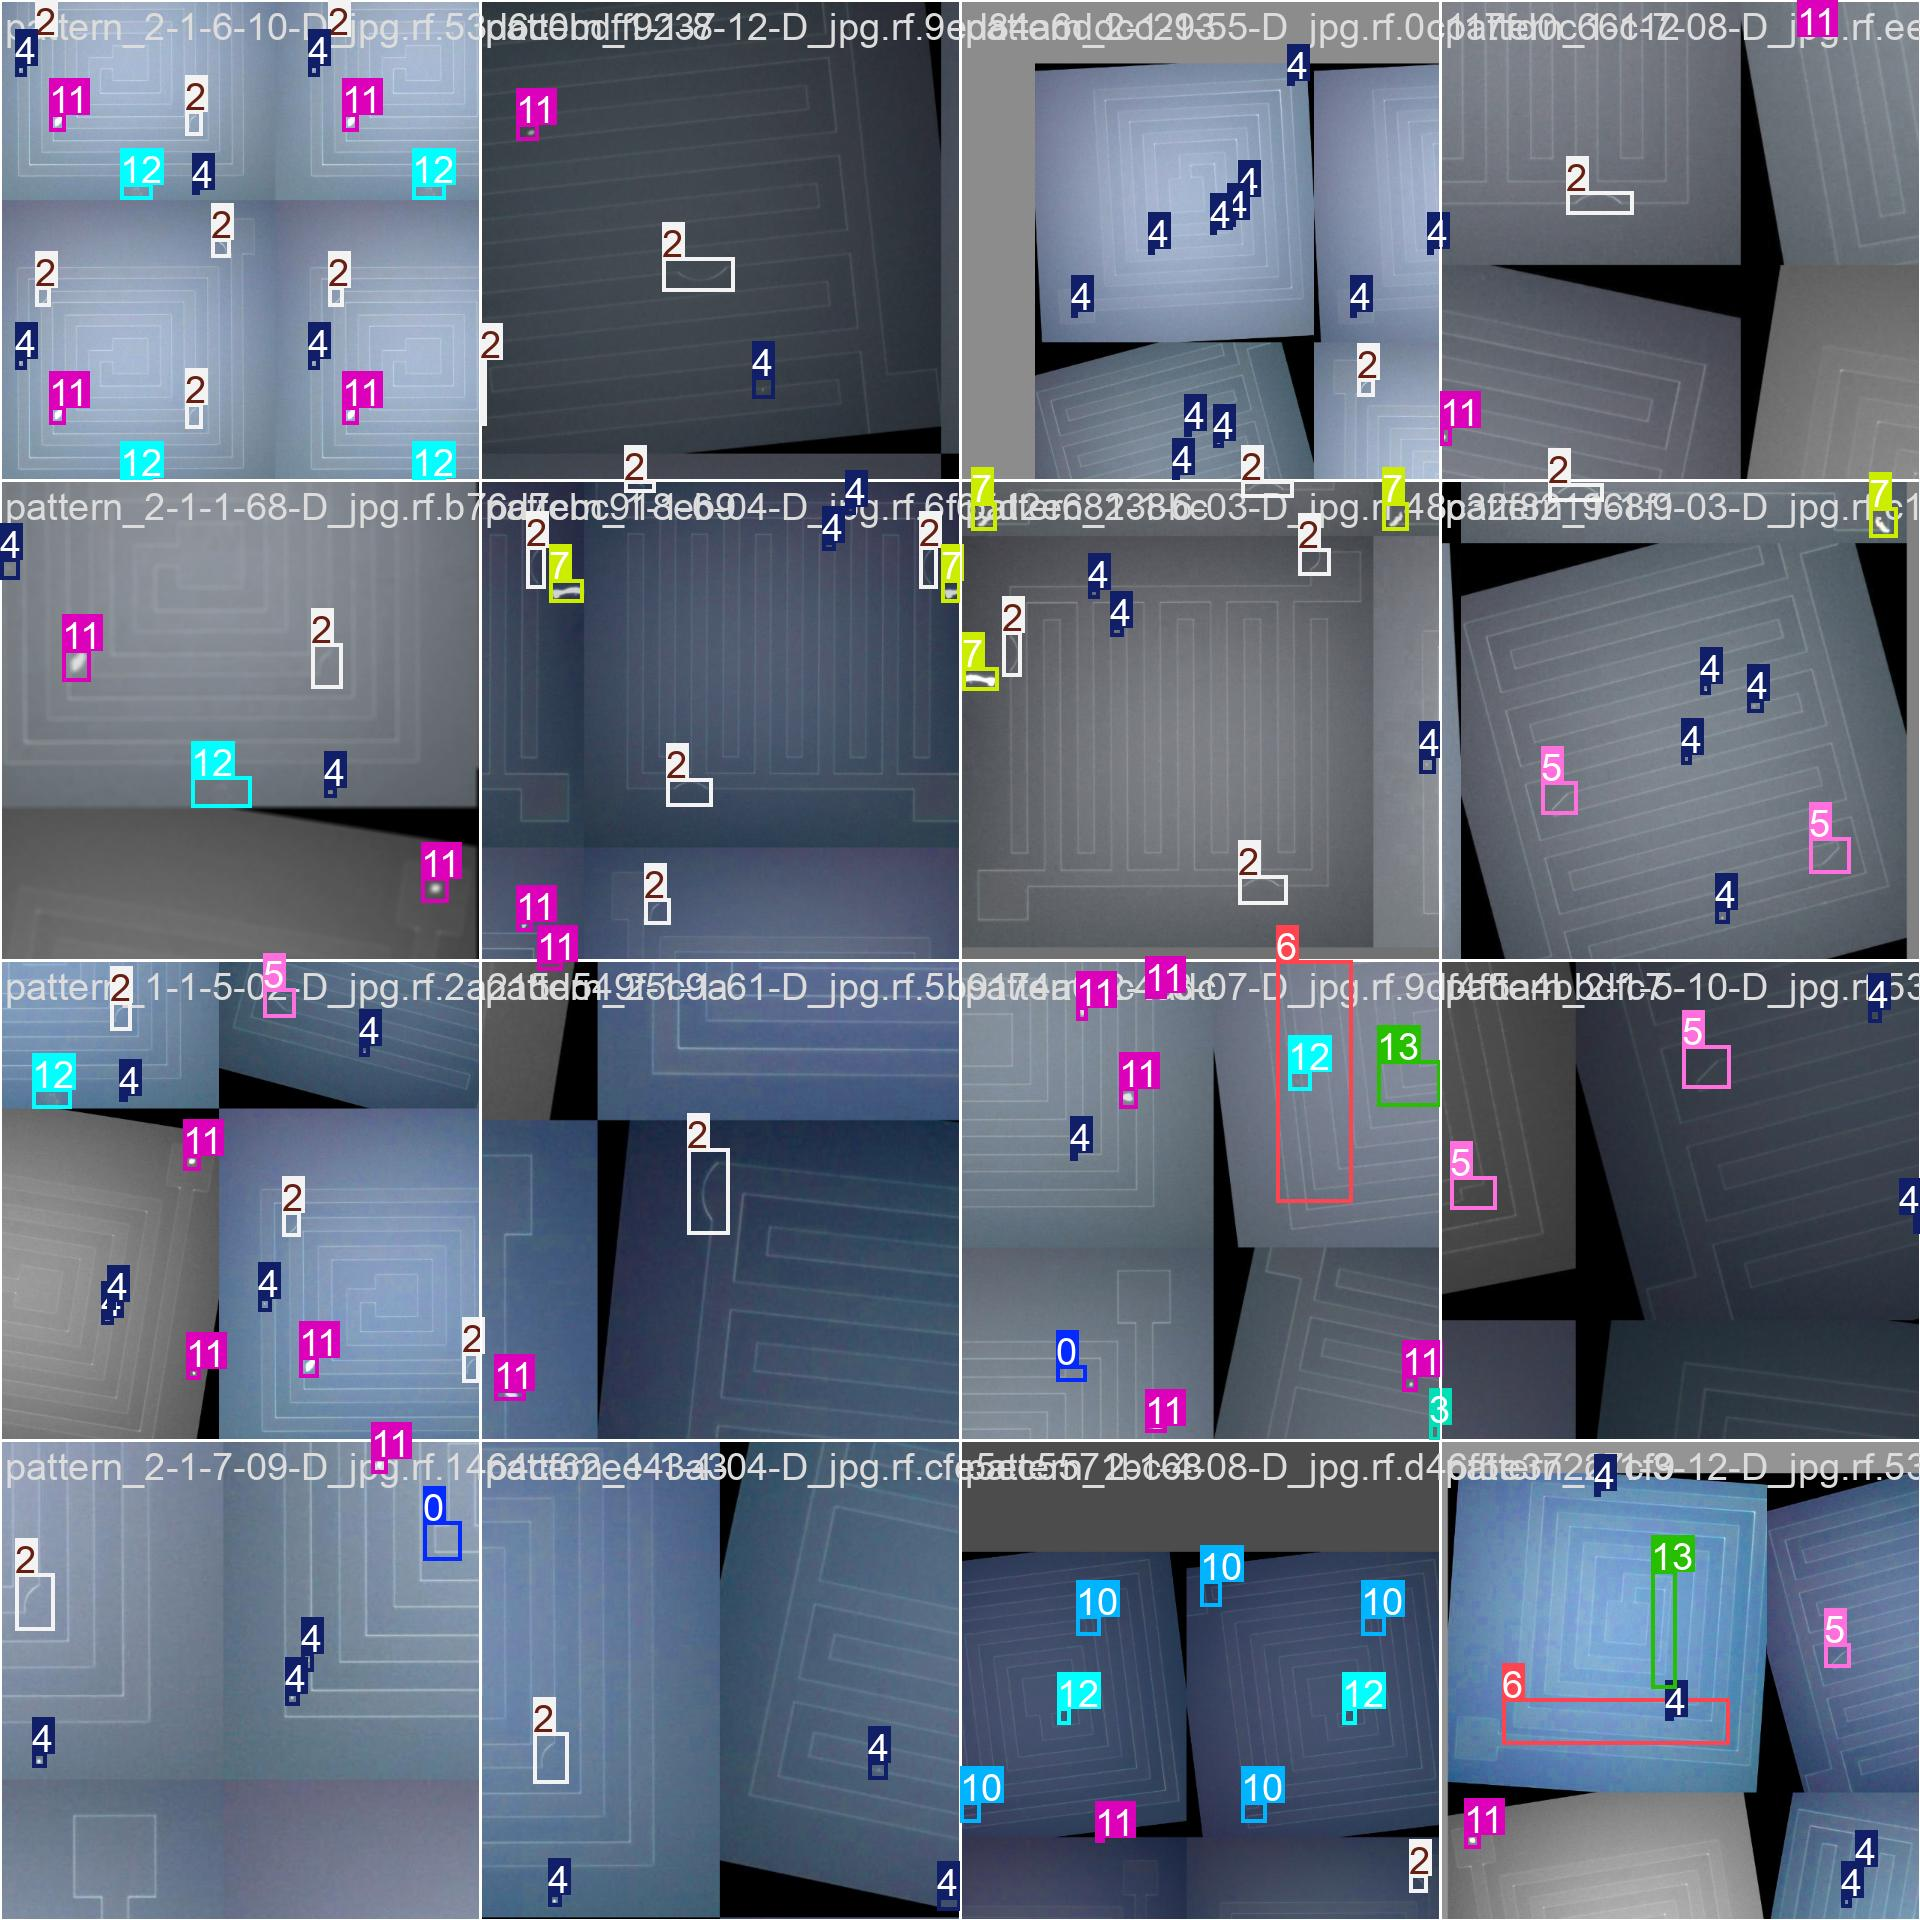

In [15]:
from PIL import Image
from IPython.display import Image, clear_output
Image(filename='/content/runs/detect/train/train_batch0.jpg',width=1000)

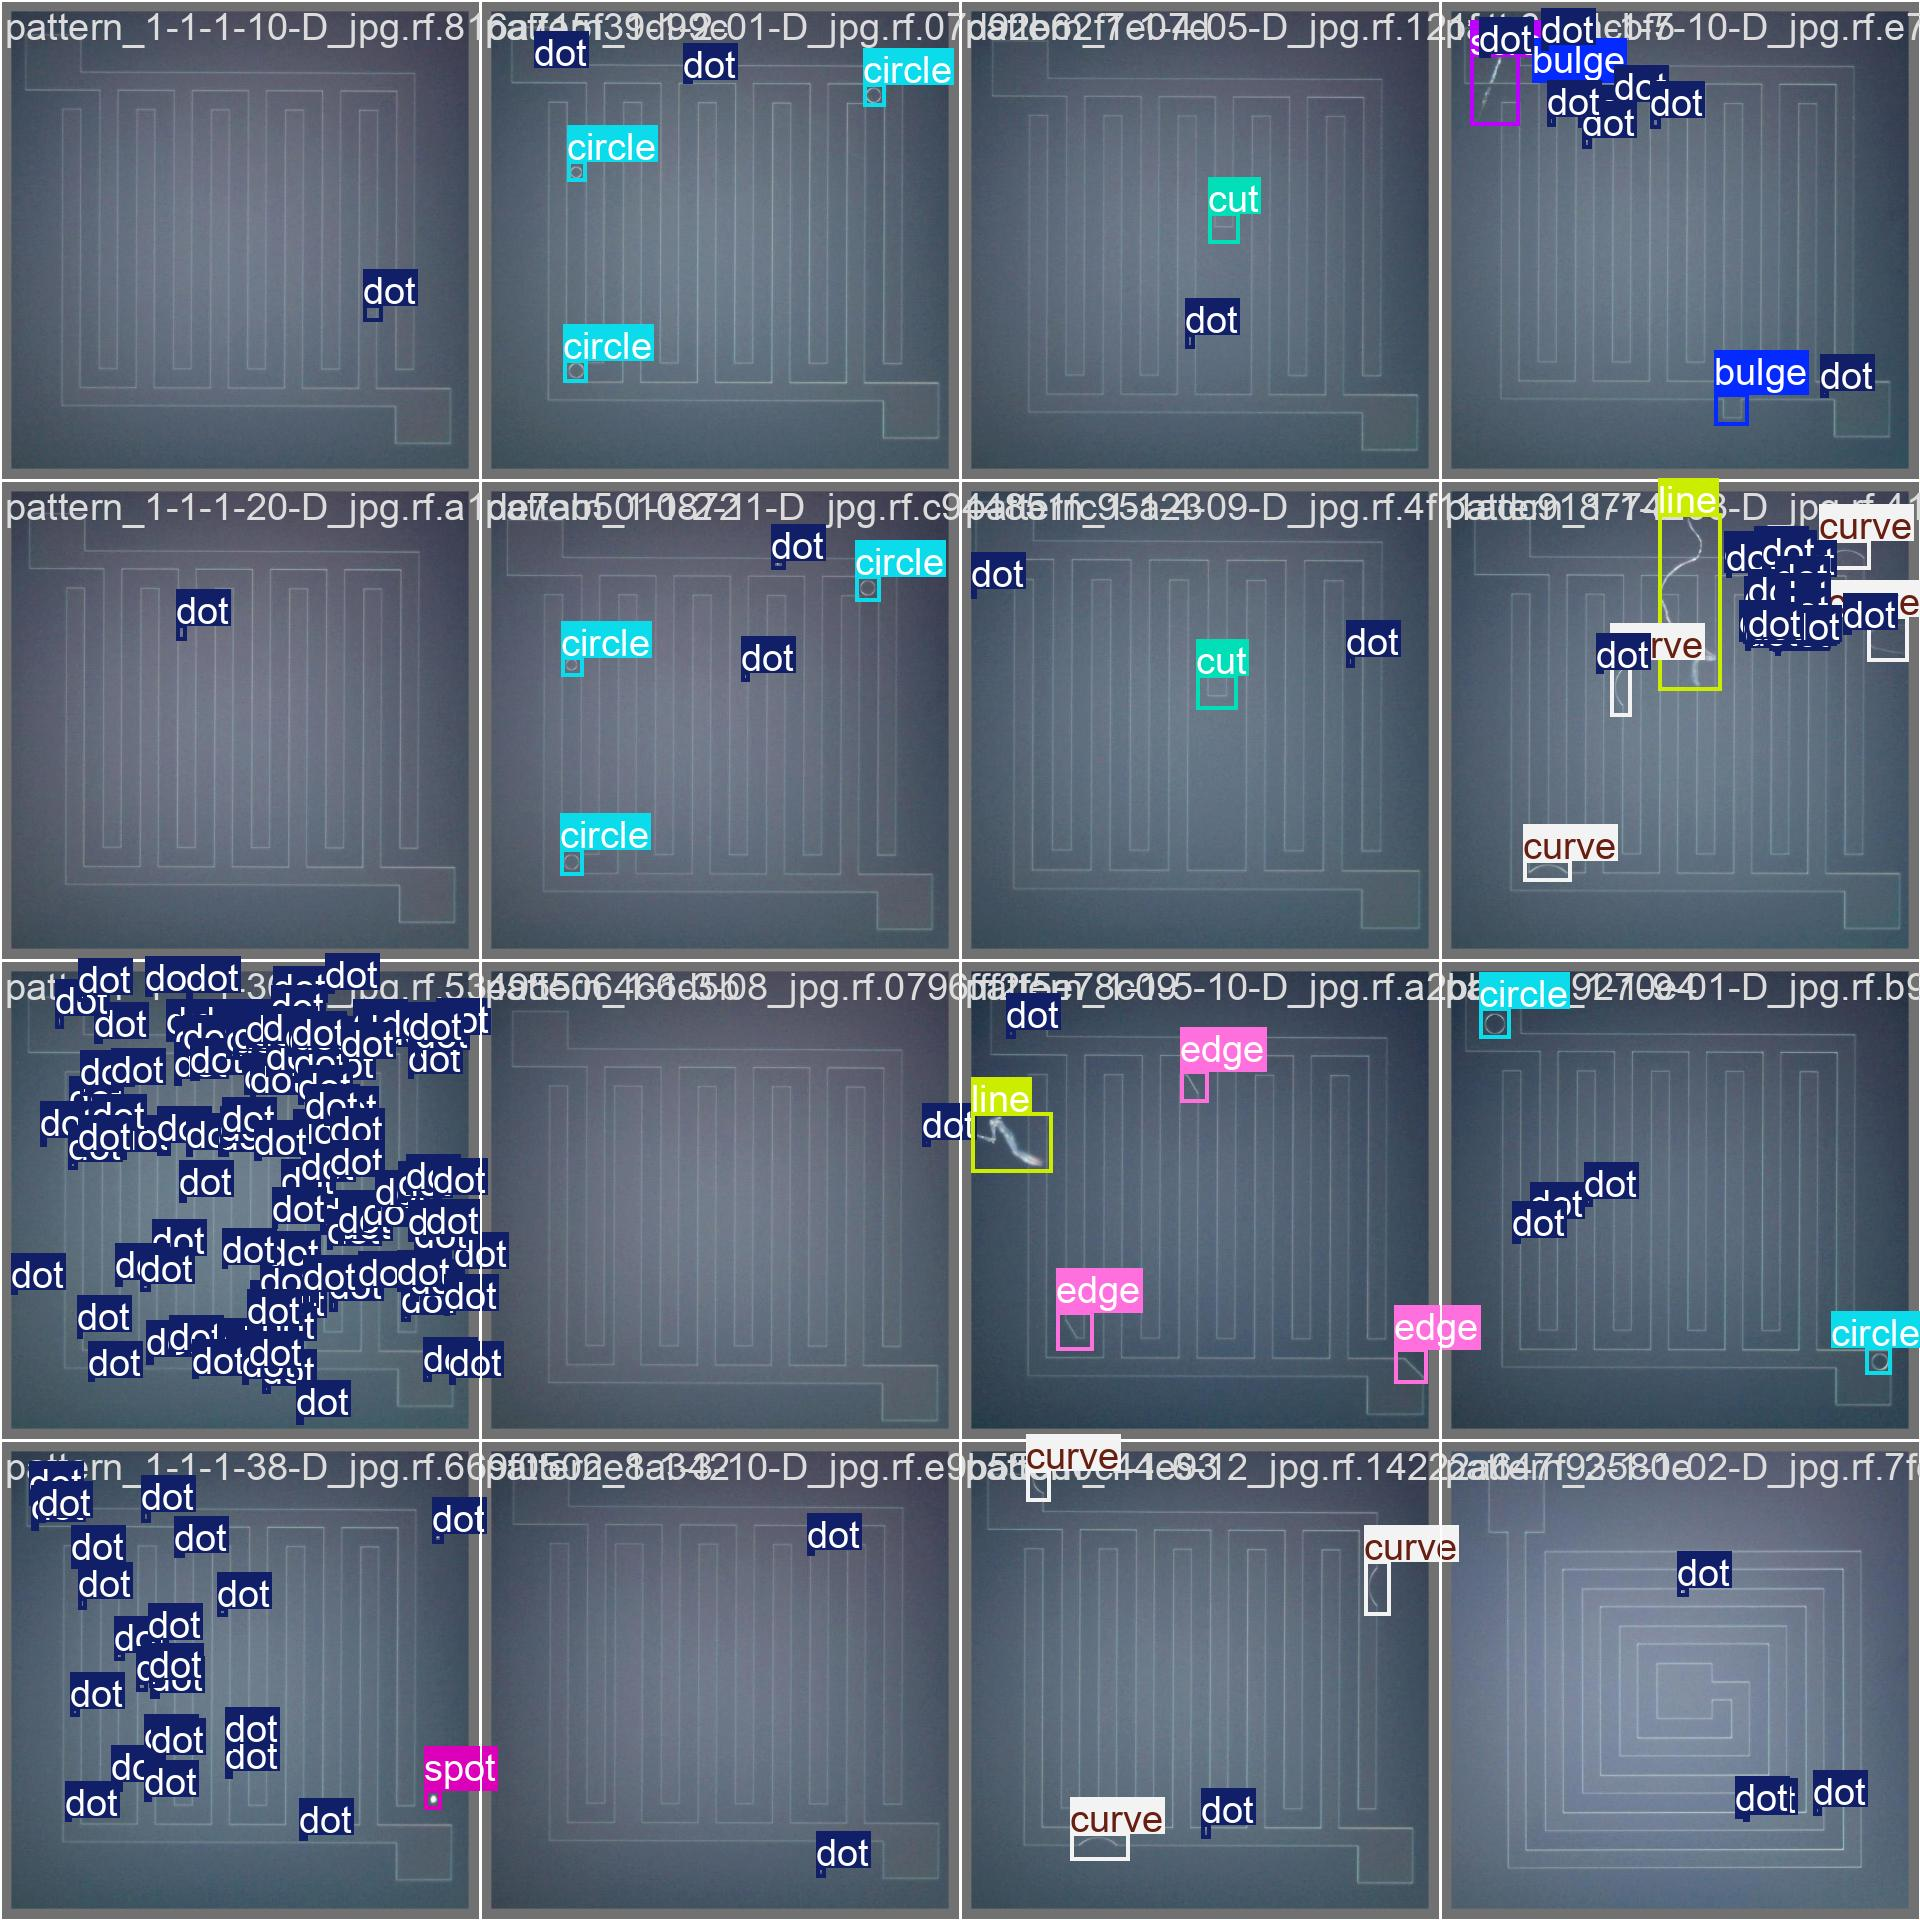

In [16]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg',width=1000)

In [17]:
results = model.predict(source='/content/Defect_Detection_V2-1/valid/images/', save=True)


image 1/41 /content/Defect_Detection_V2-1/valid/images/pattern_1-1-1-10-D_jpg.rf.816a715f39d99c3da6e6a9f81d5e320a.jpg: 640x640 1 dot, 8.6ms
image 2/41 /content/Defect_Detection_V2-1/valid/images/pattern_1-1-1-20-D_jpg.rf.a1de7ab5010872fa4c9e3b2a81f6fd0a.jpg: 640x640 1 dot, 7.0ms
image 3/41 /content/Defect_Detection_V2-1/valid/images/pattern_1-1-1-36-D_jpg.rf.53495506466d5b3893ad7f047bd80dee.jpg: 640x640 107 dots, 7.0ms
image 4/41 /content/Defect_Detection_V2-1/valid/images/pattern_1-1-1-38-D_jpg.rf.669f0502e8a342672c1cce0edbb1d794.jpg: 640x640 25 dots, 1 spot, 7.0ms
image 5/41 /content/Defect_Detection_V2-1/valid/images/pattern_1-1-2-01-D_jpg.rf.07d92b62f7e07d7863456083440110db.jpg: 640x640 3 circles, 2 dots, 7.0ms
image 6/41 /content/Defect_Detection_V2-1/valid/images/pattern_1-1-2-11-D_jpg.rf.c944851fc95a235c8dec5dae12b1a91e.jpg: 640x640 3 circles, 2 dots, 7.0ms
image 7/41 /content/Defect_Detection_V2-1/valid/images/pattern_1-1-3-08_jpg.rf.0796fff2f5e78c09466c1f25452d1293.jpg: 640x6

In [18]:
print(type(results), len(results))

<class 'list'> 41


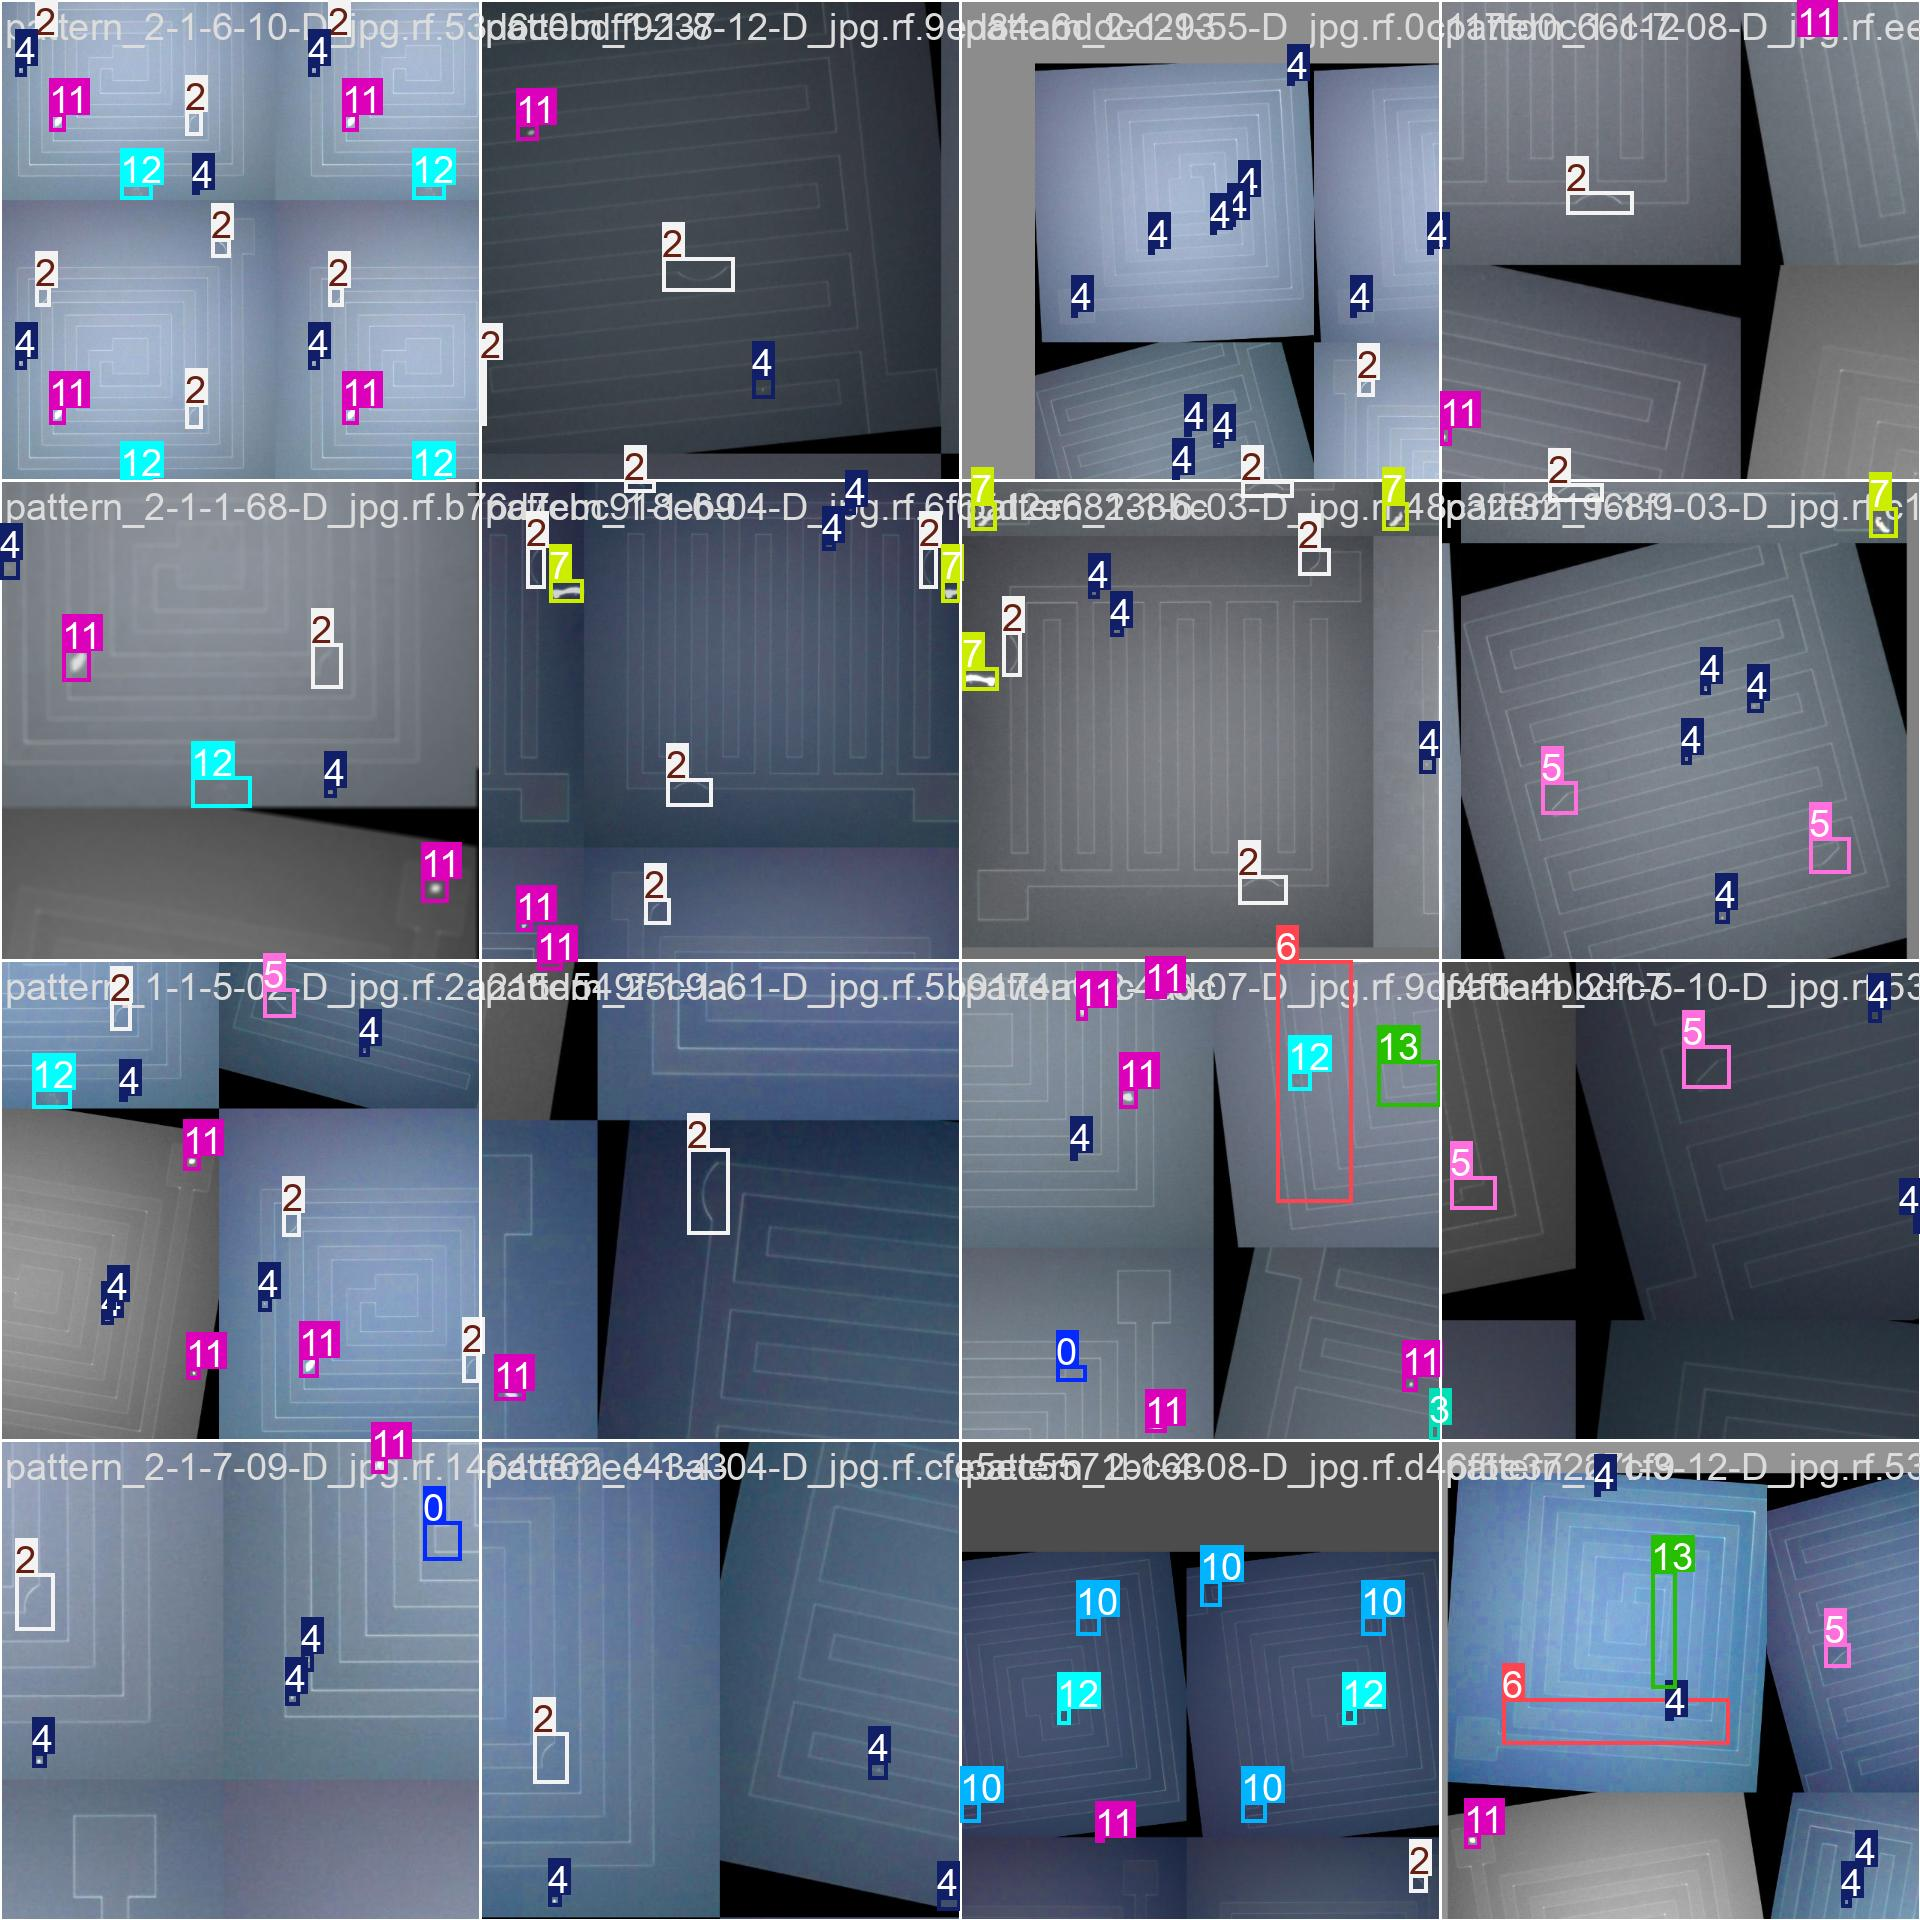

In [19]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/runs/detect/train/*.jpg'))
display(Image(filename=image_name,width=600,height=600))